<a href="https://colab.research.google.com/github/andrade-adsf/data_science_bootcamp/blob/main/covid_e_imunidade_de_rebanho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uma análise sobre os dados de covid no Brasil e a imunidade de rebanho

---



Os dados utilizados nesse notebook foram disponibilizados atráves do site https://brasil.io/dataset/covid19/caso/, na data de 06-11-2020.

A análise está sendo feita como parte do bootcamp de data science aplicada da Alura.

##Introdução

O primeiro caso noticiado de covid-19 no mundo aconteceu em 17 de novembro de 2019, desde então a doença vem preocupando a população e lideres mundiais e diversas estratégias já foram discutidas para neutralizar o vírus e trazer segurança novamente para a população. Dentre elas está a imunidade de rebanho natural, que assume que pessoas uma vez infectadas e que conseguiram sobreviver ficam imunes ao vírus, não bastasse as milhares de vidas colocadas em risco a partir dessa estratégia, visto que ela visa ser atingida por imunidade ganha ao contrair o vírus e não por uma vacina, também temos o fato de que não necessariamente pessoas infectadas ficam imunes, com alguns casos de reinfecções acontecendo ao redor do mundo.


Nesse projeto vamos analisar os números da covid no Brasil, analisar se há subnotificação assumindo 0.7% como a taxa de mortalidade do vírus, e por fim verificar o quão longe estamos da imunidade de rebanhos e quantas vidas ainda seriam colocadas em risco caso nos arrisquemos a tomar essa estratégia.

##Importando as libraries e dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importando as libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#setando o estilo gráfico utilizado nas análises
sns.set()

#salvando o endereço dos dados em uma variável
path = "/content/drive/MyDrive/caso.csv"

#importando os dados
df = pd.read_csv(path)

#configurando como o pandas mostra números grandes
pd.options.display.float_format = "{:,.4f}".format

##Conhecendo nossos dados:

Vamos iniciar o desenvolvimento do nosso projeto analisando as primeiras entradas da nossa tabela e, primeiramente tentando entender o que significa cada uma das variáveis.

Essa parte de investigação é importante para garantir que nossos dados não estão enviesados e começarmos os estudos sabendo as histórias que eles estão nos contando.

In [ ]:
df.head()#mostrar 5 primeiras entradas

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,"881,935.0000","894,470.0000",12.0000,"3,493.4654",0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,"881,935.0000","894,470.0000",12.0000,"3,490.1115",0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,"881,935.0000","894,470.0000",12.0000,"3,461.4912",0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,"881,935.0000","894,470.0000",12.0000,"3,460.5968",0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,"881,935.0000","894,470.0000",12.0000,"3,460.2614",0.0224


###Sumário

`date`: data de coleta dos dados no formato AAAA-MM-DD.

`state`: sigla da unidade federativa, exemplo: SP.

`city`: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos* também).

`place_type`: tipo de local que esse registro descreve, pode ser city ou state.

`confirmed`: número de casos confirmados.

`deaths`: número de mortes.

`order_for_place`: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

`is_last`: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

`estimated_pupulation_2019`: população estimada para esse município/estado em 2019, segundo o IBGE (É dito na documentação do dataset que essa coluna possui registros desatualizados).

`estimated_population`: população estimada para esse município/estado em 2020, segundo o IBGE.

`city_ibge_cpde`: código IBGE do local.

`confirmed_per_100k_inhabitants`: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).

`death_rate`: taxa de mortalidade (mortes / confirmados).

*: Algumas Secretarias separam os casos importados de outros países ou estados, sem contabilizá-los no município onde o paciente recebeu o diagnóstico. Caso aconteça isso será contabilizado como "Importados"

###Tipos de dados

Como estamos estamos conhecendo nossos dados é importante saber a extensão deles e os tipos de variáveis que ele contém.

In [ ]:
print("Entradas:\t{}".format(df.shape[0]))#contar entradas
print("Variáveis:\t{}\n".format(df.shape[1]))#contar variáveis
df.dtypes#mostrar tipos de dados em cada uma das variáveis

Entradas:	936870
Variáveis:	13



date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

###Verificando se há dados nulos

Vimos mais acima que temos dados nulos (NaN) em nossa tabela, vamos observa-los rapidamente e enteder quantos porcento eles representam do nosso total.

In [ ]:
#Verificar porcentagem de dados nulos
((df.isna().sum() / df.shape[0]).sort_values(ascending=False))

confirmed_per_100k_inhabitants   0.0181
city                             0.0068
city_ibge_code                   0.0039
estimated_population             0.0039
estimated_population_2019        0.0039
death_rate                       0.0000
is_last                          0.0000
order_for_place                  0.0000
deaths                           0.0000
confirmed                        0.0000
place_type                       0.0000
state                            0.0000
date                             0.0000
dtype: float64

Temos dados nulos em algumas colunas mas como podem ver eles representa menos de 2% dos dados de cada uma.

Os dados faltantes na coluna `city` representam as linhas onde os dados se referem aos estados como um todo.

Além disso os dados nulos das colunas, `city_ibge_code`, `estimated_population` e `estimated_population_2019` estão assim pois correspondem a linhas onde a coluna `city` foi preenchida com "Importados/Indefinidos", como é possível observar na amostra à seguir.

In [ ]:
#mostrar os valores nulos em estimated_population_2019
df[df["estimated_population_2019"].isna()]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
26192,2020-11-02,AL,Importados/Indefinidos,city,8,8,219,True,nan,nan,nan,nan,1.0000
26193,2020-11-01,AL,Importados/Indefinidos,city,8,8,218,False,nan,nan,nan,nan,1.0000
26194,2020-10-31,AL,Importados/Indefinidos,city,8,8,217,False,nan,nan,nan,nan,1.0000
26195,2020-10-30,AL,Importados/Indefinidos,city,8,8,216,False,nan,nan,nan,nan,1.0000
26196,2020-10-29,AL,Importados/Indefinidos,city,8,8,215,False,nan,nan,nan,nan,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863547,2020-03-23,SP,Importados/Indefinidos,city,0,0,5,False,nan,nan,nan,nan,0.0000
863548,2020-03-22,SP,Importados/Indefinidos,city,0,0,4,False,nan,nan,nan,nan,0.0000
863549,2020-03-21,SP,Importados/Indefinidos,city,0,0,3,False,nan,nan,nan,nan,0.0000
863550,2020-03-20,SP,Importados/Indefinidos,city,8,0,2,False,nan,nan,nan,nan,0.0000


Minha hipotese para os dados faltantes em `confirmed_per_100k_inhabitants` é que são lugares onde o número de confirmados é muito baixo ou inexistente. Vamos verificar fazendo um histograma para o número de confirmados apenas para as linhas onde a coluna em questão não foi preenchida.

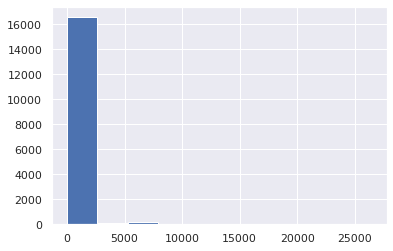

In [ ]:
only_na = df[df["confirmed_per_100k_inhabitants"].isna()]#separando os dados
only_na["confirmed"].hist()#plotando o histograma

Como previsto a maioria dos dados são de cidades onde não houveram casos confirmados, agora vamos ver separadamente as cidades onde houveram casos confirmados e tentar entender o motivo de mesmo assim essa coluna não estar preenchida.

In [ ]:
only_na[only_na["confirmed"] > 0].sort_values("confirmed", ascending=False)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
39370,2020-11-04,DF,Importados/Indefinidos,city,26422,296,224,True,nan,nan,nan,nan,0.0112
39371,2020-11-03,DF,Importados/Indefinidos,city,26386,294,223,False,nan,nan,nan,nan,0.0111
39372,2020-11-02,DF,Importados/Indefinidos,city,26316,293,222,False,nan,nan,nan,nan,0.0111
39373,2020-11-01,DF,Importados/Indefinidos,city,26294,293,221,False,nan,nan,nan,nan,0.0111
39374,2020-10-31,DF,Importados/Indefinidos,city,26251,293,220,False,nan,nan,nan,nan,0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233576,2020-03-20,GO,Importados/Indefinidos,city,1,0,2,False,nan,nan,nan,nan,0.0000
233563,2020-04-03,GO,Importados/Indefinidos,city,1,0,15,False,nan,nan,nan,nan,0.0000
55254,2020-03-22,CE,Importados/Indefinidos,city,1,0,4,False,nan,nan,nan,nan,0.0000
55255,2020-03-21,CE,Importados/Indefinidos,city,1,0,3,False,nan,nan,nan,nan,0.0000


Então percebemos que temos uma grande quantidade de casos onde não há cidade, portanto não há população e portanto não há como calcular quantos foram confirmados a cada 100 mil habitantes.

Mas fazendo essa separação também conseguimos encontrar dados com a coluna `city` preenchida?

In [ ]:
only_na[only_na["city"] != "Importados/Indefinidos"].sort_values("confirmed", ascending=False)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1856,2020-06-02,AC,Jordão,city,0,0,15,False,"8,317.0000","8,473.0000","1,200,328.0000",nan,0.0000
596454,2020-06-28,PR,Borrazópolis,city,0,0,7,False,"6,592.0000","6,439.0000","4,103,305.0000",nan,0.0000
555957,2020-04-30,RJ,Macuco,city,0,0,8,False,"5,599.0000","5,623.0000","3,302,452.0000",nan,0.0000
555958,2020-04-29,RJ,Macuco,city,0,0,7,False,"5,599.0000","5,623.0000","3,302,452.0000",nan,0.0000
555959,2020-04-28,RJ,Macuco,city,0,0,6,False,"5,599.0000","5,623.0000","3,302,452.0000",nan,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419783,2020-07-08,MG,Bertópolis,city,0,0,12,False,"4,604.0000","4,607.0000","3,106,606.0000",nan,0.0000
419784,2020-07-07,MG,Bertópolis,city,0,0,11,False,"4,604.0000","4,607.0000","3,106,606.0000",nan,0.0000
419785,2020-07-06,MG,Bertópolis,city,0,0,10,False,"4,604.0000","4,607.0000","3,106,606.0000",nan,0.0000
419786,2020-07-05,MG,Bertópolis,city,0,0,9,False,"4,604.0000","4,607.0000","3,106,606.0000",nan,0.0000


A resposta é sim, então esses são a maioria dos nossos dados, tendo todos os valores de confirmados = 0, e o nosso outlier é quando não sabemos o nome da cidade para aquela informação.

##Definição dos dados

Após conhecer nossos dados melhor vamos fazer alguns ajustes em nosso dataframe de forma que os dados sirvam de forma melhor para nossas análises.

In [ ]:
#separando o df entre duas tabelas
df_state = df[df["place_type"] == "state"].copy()#selecionando a tabela somente com os dados dos estados
df_state.drop("city", axis=1, inplace=True)#excluindo a coluna city
df_city = df[df["place_type"] == "city"].copy()#selecionando a tabela somente com os dados das cidades

##Letalidade e notificação

Agora que já conhecemos nossos dados vamos atrás de entender a letalidade do vírus em cada estado e a partir disso vamos ter uma ideia se há subnotificação ou não.

Se tivermos mais mortes do que a taxa de mortalidade padrão do vírus (entre 0.5% e 1%) isso pode indicar subnotificação.

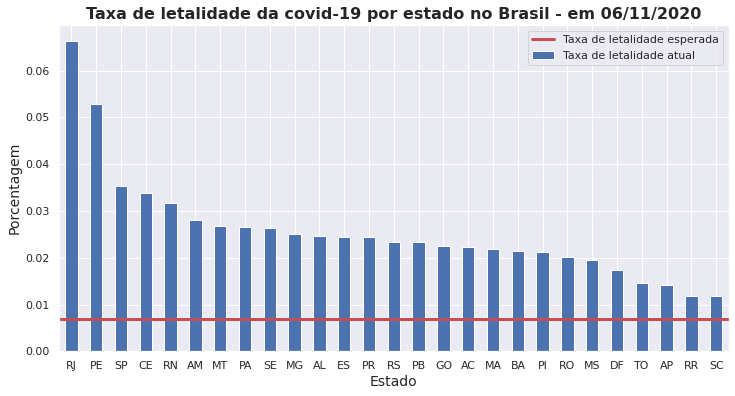

In [ ]:
#separando os dados e ordenando do maior para o menor
mais_recente = df_state[df_state["is_last"] == True].sort_values("death_rate", ascending=False)

#plotando o gráfico
ax = mais_recente.plot(x="state", y="death_rate", kind="bar", figsize=(12,6))

#configurando o gráfico
plt.xticks(rotation=0)#rotacionar as labels do eixo x
ax.set_ylabel("Porcentagem", fontsize=14)#setando a legenda da label y
ax.set_xlabel("Estado", fontsize=14)#setando a legenda da label x
plt.title("Taxa de letalidade da covid-19 por estado no Brasil - em 06/11/2020", fontsize=16, fontweight="bold")#setando o titulo do gráfico
plt.axhline(y=0.007, linewidth=3, color="r", label="Letalidade padrão", linestyle="-")#plotar linha da letalidade esperada
plt.legend(["Taxa de letalidade esperada", "Taxa de letalidade atual"])#definir a legenda

#mostrar o gráfico
plt.show()

Os dados indicam possível subnotificação de casos em todos os estados do Brasil.

Porém outras coisas podem aumentar a taxa de letalidade, mesmo com muitos testes sendo feitos e divulgados, caso não tenha leitos em hospitais para que haja tratamento para todos os doentes. Resumindo, não ter espaço em hospital é igual à mais pessoas doentes não sendo tratadas o que é igual à mais pessoas morrendo.

##Imunidade de rebanho

Nesse contexto vamos analisar a imunidade de rebanho alcançada por uma possível imunidade natural adquirida após se recuperar do vírus, lembrando que imunidade de rebanho também pode ser atingida com a vacina mas esse não é o caso que estamos discutindo.

Tendo dito isso, estima-se que a imunidade de rebanho natural seria alcançada quando cerca de 70% da população já tivesse contraido o vírus e se recuperado.

Vamos observar quantos porcento da população de cada estado já contraiu (não estamos separando aqui pessoas que se recuperaram e pessoas que faleceram, apenas casos confirmados).

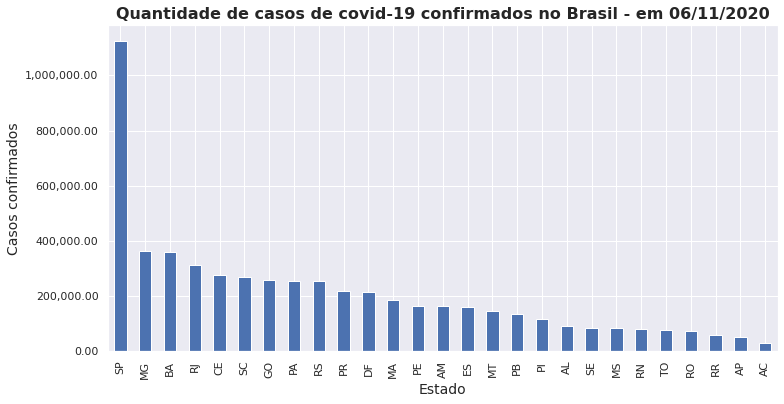

In [ ]:
#ordenando do menor número de casos para o maior
mais_recente = mais_recente.sort_values("confirmed", ascending=False)

#plotando o gráfico
ax = mais_recente.plot(x="state", y="confirmed", figsize=(12,6), kind="bar", legend=None)

#formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))#definir como os números são mostrados na label y
ax.set_ylabel("Casos confirmados", fontsize=14)#definir legenda da label y
ax.set_xlabel("Estado", fontsize=14)#definir legenda da label x
plt.title("Quantidade de casos de covid-19 confirmados no Brasil - em 06/11/2020", fontsize=16, fontweight="bold")#definir titulo


#mostrar gráfico
plt.show()

São Paulo é disparado o estado com mais casos, será que está perto de atingir os 70% de infectados para atingir a imunidade de rebanho natural?

Calculei qual valor representa 70% da população de cada estado e em seguida coloquei no mesmo gráfico qual seria a meta para atingir a imunidade.

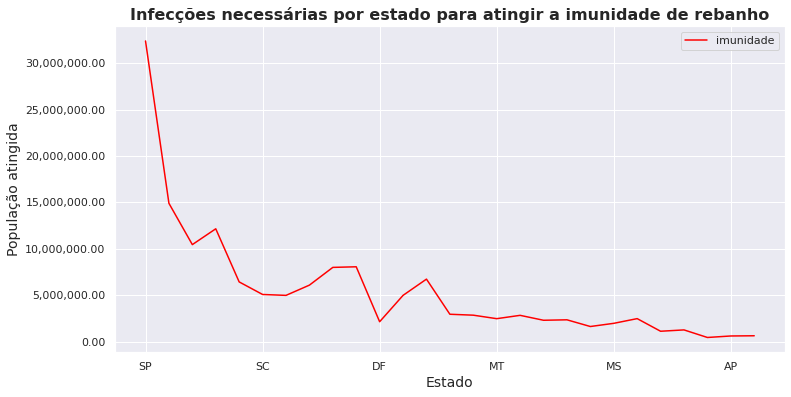

In [ ]:
#criando uma nova tabela
imunidade_pop = mais_recente["estimated_population"]*0.7#separando 70% da população
estado = mais_recente["state"]#separando os estados
imunidade_rebanho = pd.concat([estado, imunidade_pop], axis=1)#juntando tudo em uma tabela
imunidade_rebanho.rename(columns={"estimated_population": "imunidade"}, inplace=True)#alterando o nome da coluna para imunidade

#plotar a nova tabela
ax = imunidade_rebanho.plot(x="state", y="imunidade", figsize=(12,6), color="red")

#formatação
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))#definir como os números são mostrados na label y
plt.title("Infecções necessárias por estado para atingir a imunidade de rebanho", fontsize=16, fontweight="bold")#definir titulo
ax.set_ylabel("População atingida", fontsize=14)#definir legenda da axis y
ax.set_xlabel("Estado", fontsize=14)#definir legenda da axis x

#mostrar grafico
plt.show()

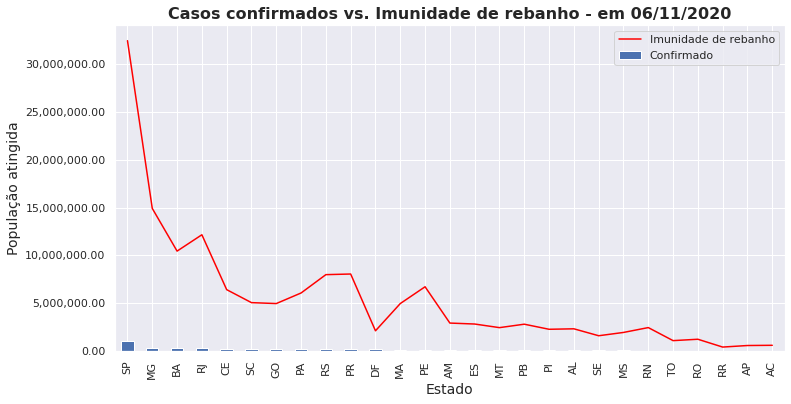

In [ ]:
#ordenando do menor número de casos para o maior
mais_recente = mais_recente.sort_values("confirmed", ascending=False)

#plotando o gráfico
ax = mais_recente.plot(x="state", y="confirmed", figsize=(12,6), kind="bar")
ax.plot(imunidade_rebanho["state"], imunidade_rebanho["imunidade"], color="red")

#formatando o gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))#definir como os números são mostrados na label y
ax.set_ylabel("População atingida", fontsize=14)#definir legenda da label y
ax.set_xlabel("Estado", fontsize=14)#definir legenda da label x
plt.title("Casos confirmados vs. Imunidade de rebanho - em 06/11/2020", fontsize=16, fontweight="bold")#definir titulo
plt.legend(["Imunidade de rebanho", "Confirmado"])#definir a legenda

#mostrar gráfico
plt.show()

Como podem ver ainda estamos bem longe de conseguir isso, o gráfico até assusta por ao ver somente o número de casos que já aconteceram já parece muita coisa, e ao comparar com a quantidade necessária para alcançar a imunidade de rebanho fica parecendo que tivemos poucos casos. A verdade não é essa, nos sabemos muito bem que muitas pessoas já se infectaram e se recuperaram e muitas já foram em meio à essa luta.

##Conclusão

A imunidade de rebanho natural é uma meta irreal, muitas vidas seriam perdidas no meio do processo e muitas outras poderiam ficar com sequelas que ainda nem conhecemos.

Com tantas vacinas sendo feitas e demonstrando excelente eficácia não nos custa muito ficar em casa protegidos e protegendo as pessoas ao nosso redor, ao invés de sair e colocar a nós mesmos e as pessoas que amamos em risco, afinal a imunização por meio da vacina nos trara o mesmo resultado sem o ônus das sequelas e vidas deixadas pra trás.